In [9]:
import pandas as pd
schoolData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/PublicSchools2014to2017_4ML_upd.csv') # read in the csv file
schoolData_SPG = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/PublicSchools2014to2017_SPG.csv') # read in the csv file

In [10]:
schoolData.shape

(9731, 148)

In [11]:
schoolData.describe()

,szip_ad,student_num,lea_avg_student_num,st_avg_student_num,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,...,Grad_project_status_Y,EVAAS Growth Status_Exceeded,EVAAS Growth Status_Met,EVAAS Growth Status_NotMet,Category_Cd_A,Category_Cd_E,Category_Cd_H,Category_Cd_I,Category_Cd_M,Category_Cd_T
count,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,...,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000
mean,27981.523173,588.443634,588.456171,587.764053,8.818107,8992.041761,0.673819,0.080056,0.079985,0.008898,...,0.089713,0.275203,0.429144,0.237899,0.015106,0.530264,0.201726,0.034323,0.194122,0.024150
std,517.884899,381.356319,270.983795,150.891747,11.182555,1023.850284,0.095480,0.014983,0.016110,0.008045,...,0.285785,0.446639,0.494979,0.425819,0.121982,0.499109,0.401310,0.182068,0.395543,0.153521
min,27006.000000,1.000000,0.000000,0.000000,0.000000,7282.190000,0.547000,0.047000,0.028000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27529.000000,346.000000,438.000000,490.000000,0.000000,8362.900000,0.613000,0.069000,0.069000,0.005000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28052.000000,520.000000,533.000000,496.000000,0.000000,8779.340000,0.628000,0.080000,0.080000,0.007000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,28394.500000,731.000000,698.500000,665.000000,20.000000,9326.890000,0.763000,0.087000,0.091000,0.011000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,28906.000000,2974.000000,1852.000000,860.000000,43.000000,17801.850000,0.878000,0.153000,0.143000,0.065000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 148 columns):
 #   Column                                                                           Dtype  
---  ------                                                                           -----  
 0   szip_ad                                                                          int64  
 1   student_num                                                                      int64  
 2   lea_avg_student_num                                                              int64  
 3   st_avg_student_num                                                               int64  
 4   Math I_Size                                                                      int64  
 5   lea_total_expense_num                                                            float64
 6   lea_salary_expense_pct                                                           float64
 7   lea_services_expense_pct                 

In [25]:
#Drop NAs
comb3 = pd.concat([schoolData, schoolData_SPG],axis=1)
comb3 = comb3.dropna()
comb3.shape

(9731, 149)

In [26]:
ya = comb3[['SPG Grade']].values
if 'SPG Grade' in comb3:
    del comb3['SPG Grade']     
Xa = comb3.values


Xa
ya

array([['A'],
       ['C'],
       ['C'],
       ...,
       ['B'],
       ['B'],
       ['B']], dtype=object)

In [27]:
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(Xa,ya)
y_pred=clfa.predict(Xa)

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ya, y_pred))

Accuracy: 1.0


In [29]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(Xa,ya)
eli5.show_weights(perm, feature_names = comb3.columns.tolist(), top=50)

Weight,Feature
0.0215 ± 0.0014,TotalTargets_pTarget_PctMet
0.0163 ± 0.0017,EVAAS Growth Status_NotMet
0.0083 ± 0.0007,MinorityMalePct
0.0039 ± 0.0012,MinorityFemalePct
0.0017 ± 0.0008,title1_type_cd_Y
0.0014 ± 0.0005,short_susp_per_c_num
0.0011 ± 0.0003,avg_daily_attend_pct
0.0009 ± 0.0005,BlackMalePct
0.0005 ± 0.0002,AsianFemalePct
0.0003 ± 0.0002,EVAAS Growth Status_Exceeded


In [54]:
schoolData_pick = schoolData[['lea_federal_perpupil_num','avg_daily_attend_pct','MinorityFemalePct']]
#schoolData_pick = schoolData[['lea_federal_perpupil_num','avg_daily_attend_pct']]

#Drop NAs
temp = pd.concat([schoolData_pick, schoolData_SPG],axis=1)
temp = temp.dropna()
temp.shape

ys1 = temp[['SPG Grade']].values
if 'SPG Grade' in temp:
    del temp['SPG Grade']     
Xs1 = temp.values


Xs1
ys1

(9731, 4)

array([[1.00640000e+03, 8.72000000e-01, 2.43243243e-01],
       [1.00640000e+03, 9.57000000e-01, 1.57699443e-01],
       [1.00640000e+03, 9.54000000e-01, 9.40959410e-02],
       ...,
       [1.23554000e+03, 9.44000000e-01, 6.21468930e-02],
       [1.23554000e+03, 9.45000000e-01, 4.48807850e-02],
       [1.23554000e+03, 9.39000000e-01, 1.02564103e-01]])

array([['A'],
       ['C'],
       ['C'],
       ...,
       ['B'],
       ['B'],
       ['B']], dtype=object)

In [31]:
clfs1=RandomForestClassifier(n_estimators=100)
clfs1.fit(Xs1,ys1)
y_preds1=clfs1.predict(Xs1)

print("Accuracy:",metrics.accuracy_score(ys1, y_preds1))

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.8117356900626863


In [32]:
perm = PermutationImportance(clfs1, random_state=1).fit(Xs1,ys1)
eli5.show_weights(perm, feature_names = temp.columns.tolist())

Weight,Feature
0.4931 ± 0.0082,avg_daily_attend_pct
0.4746 ± 0.0115,lea_federal_perpupil_num


In [53]:
y_preds1.dtype

dtype('O')

In [50]:
import matplotlib.pyplot as plt
sns.factorplot(y_preds1, aspect=2,
                       kind="count")
plt.show()

NameError: name 'sns' is not defined

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(schoolData_SPG)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [36]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

# scale attributes by the training set
scl_obj = StandardScaler()

# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(Xa,ya): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xa[train_indices]
    y_train = ya[train_indices]
    
    X_test = Xa[test_indices]
    y_test = ya[test_indices]

In [39]:
clfa2=RandomForestClassifier(n_estimators=100)
clfa2.fit(X_train,y_train)
y_pred2=clfa2.predict(X_test)

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7395993836671803


In [41]:
perm = PermutationImportance(clfa, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = comb3.columns.tolist(), top=50)

Weight,Feature
0.0230 ± 0.0031,TotalTargets_pTarget_PctMet
0.0198 ± 0.0034,EVAAS Growth Status_NotMet
0.0080 ± 0.0017,MinorityMalePct
0.0050 ± 0.0008,MinorityFemalePct
0.0016 ± 0.0012,title1_type_cd_Y
0.0009 ± 0.0012,avg_daily_attend_pct
0.0005 ± 0.0000,short_susp_per_c_num
0.0004 ± 0.0004,BlackMalePct
0.0003 ± 0.0005,AsianFemalePct
0.0003 ± 0.0005,student_num


In [57]:
for train_indices, test_indices in cv_object.split(Xs1,ys1): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    Xs_train = Xs1[train_indices]
    ys_train = ys1[train_indices]
    
    Xs_test = Xs1[test_indices]
    ys_test = ys1[test_indices]

In [62]:
ys_test

array([['B'],
       ['F'],
       ['B'],
       ...,
       ['C'],
       ['B'],
       ['B']], dtype=object)

In [63]:
clfs2=RandomForestClassifier(n_estimators=100)
clfs2.fit(Xs_train,ys_train)
y_preds2=clfs2.predict(Xs_test)

print("Accuracy:",metrics.accuracy_score(ys_test, y_preds2))

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.5095017976373909


In [64]:
perm = PermutationImportance(clfs2, random_state=1).fit(Xs_test,ys_test)
eli5.show_weights(perm, feature_names = temp.columns.tolist())

Weight,Feature
0.1351 ± 0.0121,MinorityFemalePct
0.1027 ± 0.0075,avg_daily_attend_pct
0.0806 ± 0.0153,lea_federal_perpupil_num


In [71]:
# schoolData_pick2 = schoolData[['avg_daily_attend_pct',
#          'crime_per_c_num','EVAAS Growth Status_Exceeded','EVAAS Growth Status_Met','EVAAS Growth Status_NotMet','lea_federal_perpupil_num',
#          'MinorityFemalePct','MinorityMalePct','Proficient_TCHR_Standard 1_Pct','short_susp_per_c_num','student_num',
#          'tchyrs_0thru3_pct','Year']]

schoolData_pick2 = schoolData[[
'TotalTargets_pTarget_PctMet',
'EVAAS Growth Status_NotMet',
'MinorityMalePct',
'MinorityFemalePct',
'title1_type_cd_Y',
'avg_daily_attend_pct',
'short_susp_per_c_num',
'BlackMalePct',
'AsianFemalePct',
'student_num',
'HispanicMalePct',
'SciGr5&8_pTarget_PctMet',
'tchyrs_0thru3_pct',
'tchyrs_11plus_pct',
'Accomplished_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 1_Pct',
'Developing_TCHR_Standard 1_Pct',
'Developing_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 3_Pct',
'Accomplished_TCHR_Standard 4_Pct',
'4-10 Years_LEA_Exp_Pct_Prin',
'Developing_TCHR_Standard 4_Pct',
'Developing_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 3_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'lea_state_perpupil_num',
'st_emer_prov_teach_pct',
'pct_GCE_ALL',
'MathGr3-8_pTarget_PctMet',
'lea_sat_avg_score_num',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'nbpts_num',
'Distinguished_TCHR_Standard 2_Pct',
'_1yr_tchr_trnovr_pct',
'lateral_teach_pct',
'0-3 Years_LEA_Exp_Pct_Prin',
'lea_flicensed_teach_pct',
'lea_tchyrs_4thru10_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_0thru3_pct',
'Category_Cd_T',
]]
#Drop NAs
temp = pd.concat([schoolData_pick2, schoolData_SPG],axis=1)
temp = temp.dropna()
temp.shape

ys2 = temp[['SPG Grade']].values
if 'SPG Grade' in temp:
    del temp['SPG Grade']     
Xs2 = temp.values


Xs2
ys2

(9731, 51)

array([[1.        , 0.        , 0.06756757, ..., 0.156     , 0.179     ,
        0.        ],
       [1.        , 0.        , 0.16326531, ..., 0.128     , 0.251     ,
        0.        ],
       [0.966     , 0.        , 0.10701107, ..., 0.128     , 0.251     ,
        0.        ],
       ...,
       [1.        , 0.        , 0.06779661, ..., 0.129     , 0.133     ,
        0.        ],
       [0.96      , 0.        , 0.0631136 , ..., 0.13      , 0.103     ,
        0.        ],
       [1.        , 0.        , 0.04273504, ..., 0.129     , 0.133     ,
        0.        ]])

array([['A'],
       ['C'],
       ['C'],
       ...,
       ['B'],
       ['B'],
       ['B']], dtype=object)

In [72]:
for train_indices, test_indices in cv_object.split(Xs2,ys2): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    Xs2_train = Xs2[train_indices]
    ys2_train = ys2[train_indices]
    
    Xs2_test = Xs2[test_indices]
    ys2_test = ys2[test_indices]

In [73]:
clfs3=RandomForestClassifier(n_estimators=100)
clfs3.fit(Xs2_train,ys2_train)
y_preds3=clfs3.predict(Xs2_test)

print("Accuracy:",metrics.accuracy_score(ys2_test, y_preds3))

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.7442218798151001


## SVM Work

In [74]:
Xs2_train_scaled = scl_obj.fit_transform(Xs2_train) # apply to training
Xs2_test_scaled = scl_obj.fit_transform(Xs2_test) 

In [76]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(Xs2_train_scaled, ys2_train)  # train object

y_hat = svm_clf.predict(Xs2_test_scaled) # get test set precitions

acc = mt.accuracy_score(ys2_test,y_hat)
conf = mt.confusion_matrix(ys2_test,y_hat)
print('accuracy:', acc )
print(conf)

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy: 0.687211093990755
[[ 63   0   0   1   4   3   0   0]
 [  1  31   0  47   3   0   0   0]
 [  0  12   0  37   1   0   0   0]
 [  0  11   0 312 141   5   0   0]
 [  3   0   0  68 627  77   0   1]
 [  2   0   0   0 109 264   6   0]
 [  2   0   0   0   2  73  19   0]
 [  0   0   0   0   0   0   0  22]]


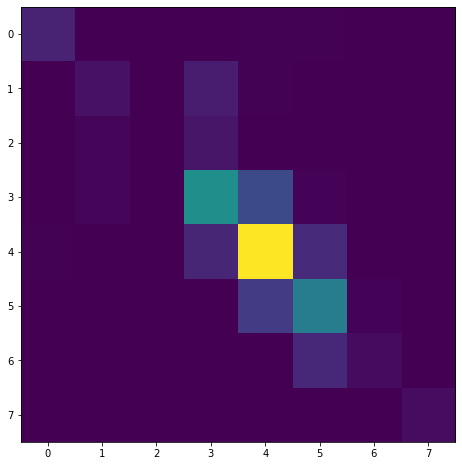

In [77]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

In [78]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(6457, 50)
(6457,)
[ 222  280  155 1557 2423 1405  334   81]


In [84]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
#df_tested_on = X_sub.iloc[train_indices] # saved from above, the indices chosen for training
df_tested_on = schoolData_pick2.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['SPG Grade'] = ys2[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
#X_sub['SPG Grade'] = y # also add it back in for the original data
schoolData_pick2['SPG Grade'] = ys2 # also add it back in for the original data['SPG Grade'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 3504 to 9264
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TotalTargets_pTarget_PctMet        6457 non-null   float64
 1   EVAAS Growth Status_NotMet         6457 non-null   int64  
 2   MinorityMalePct                    6457 non-null   float64
 3   MinorityFemalePct                  6457 non-null   float64
 4   title1_type_cd_Y                   6457 non-null   int64  
 5   avg_daily_attend_pct               6457 non-null   float64
 6   short_susp_per_c_num               6457 non-null   float64
 7   BlackMalePct                       6457 non-null   float64
 8   AsianFemalePct                     6457 non-null   float64
 9   student_num                        6457 non-null   int64  
 10  HispanicMalePct                    6457 non-null   float64
 11  SciGr5&8_pTarget_PctMet            6457 non-null   fl

C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\taniat470s\Anaconda3\envs\ML7331\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'tchyrs_0thru3_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'tchyrs_0thru3_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'avg_daily_attend_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'avg_daily_attend_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'short_susp_per_c_num (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'short_susp_per_c_num (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'MinorityFemalePct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'MinorityFemalePct (Original)')

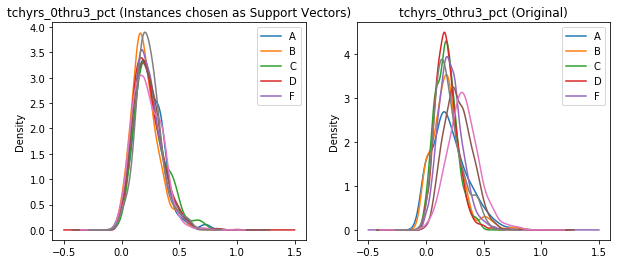

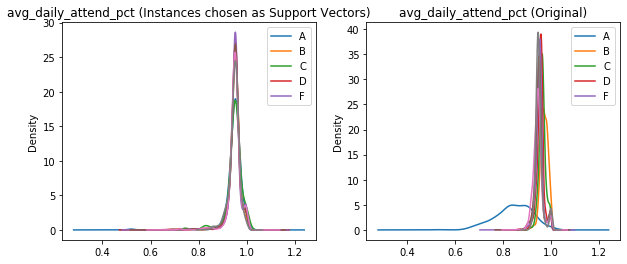

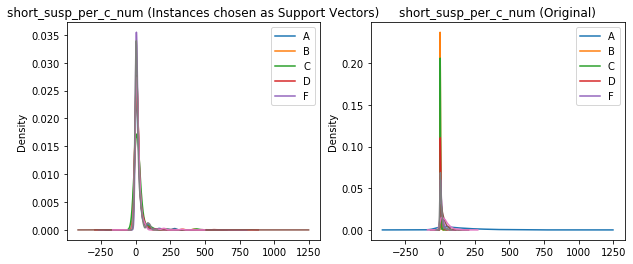

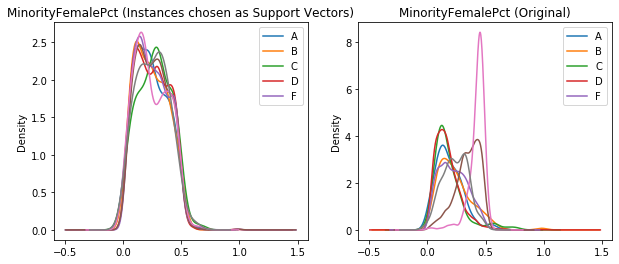

In [97]:
# now lets see the statistics of these attributes
#from pandas.tools.plotting import boxplot
from pandas.plotting import boxplot
from matplotlib import pyplot as plt

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['SPG Grade'])
#df_grouped = X_sub.groupby(['SPG Grade'])
df_grouped = schoolData_pick2.groupby(['SPG Grade'])

# plot KDE of Different variables
vars_to_plot = ['tchyrs_0thru3_pct','avg_daily_attend_pct','short_susp_per_c_num','MinorityFemalePct']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Original)')

